In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



data=pd.read_csv("energydata_complete.csv")
data=data.drop(['date'],axis=1)
data=(data-data.mean())/data.std()
y=data.Appliances

df=data.drop(['Appliances'],axis=1)
a=np.array([])
for i in range(len(y)):
    
    if y[i]>=(y.median(axis=0)):
        a=np.append(a,1)
    elif y[i]<(y.median(axis=0)):
        a=np.append(a,0)
df=df.assign(Class=a) 
y=df.Class

df=df.drop(['Class'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [3]:
from sklearn.preprocessing import OneHotEncoder 
onehotencoder = OneHotEncoder() 
data_mushroom=pd.read_csv("mushrooms.csv")
y_mushroom=data_mushroom.target
df_mushroom=data_mushroom.drop(['target'],axis=1)
df_mushroom = onehotencoder.fit_transform(df_mushroom).toarray() 
y_mushrooms=pd.DataFrame(y_mushroom)
y_mushrooms = onehotencoder.fit_transform(y_mushrooms).toarray()

X_trainm, X_testm, y_trainm, y_testm = train_test_split(df_mushroom, y_mushroom, test_size=0.2)
X_trainms, X_testms, y_trainms, y_testms = train_test_split(df_mushroom, y_mushrooms, test_size=0.2)

In [4]:
def neighb(K_list,X_train,y_train,X_test,y_test,p):

 scores_list=[]
 error=[]
 for k in K_list:
    neighbors=KNeighborsClassifier(n_neighbors=k,p=p)
    neighbors.fit(X_train,y_train)
    y_pred=neighbors.predict(X_test)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))
    error.append(np.mean(y_pred != y_test))
    
 return scores_list,error

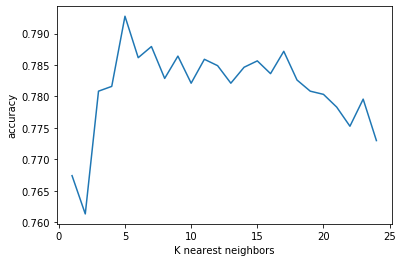

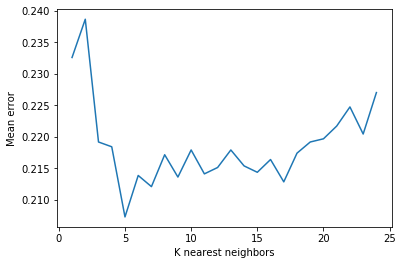

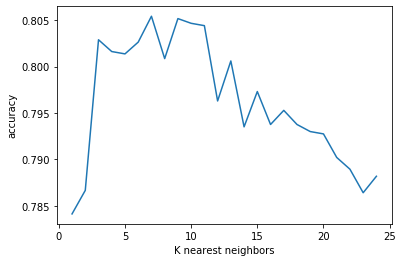

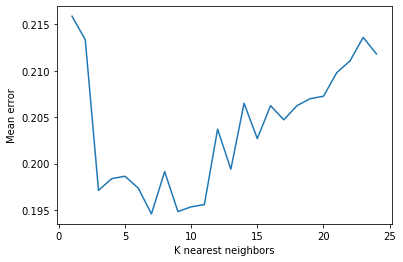

In [10]:
k_list=range(1,25)
scores_list=[]
error_list=[]
scores_list,error_list=neighb(k_list,X_train,y_train,X_test,y_test,2)
plt.plot(k_list,scores_list)
plt.xlabel("K nearest neighbors")
plt.ylabel("accuracy")
plt.show()
plt.plot(k_list,error_list)
plt.xlabel("K nearest neighbors")
plt.ylabel("Mean error")
plt.show()

k_list=range(1,25)
scores_list=[]
error_list=[]
scores_list,error_list=neighb(k_list,X_train,y_train,X_test,y_test,1)
plt.plot(k_list,scores_list)
plt.xlabel("K nearest neighbors")
plt.ylabel("accuracy")
plt.show()
plt.plot(k_list,error_list)
plt.xlabel("K nearest neighbors")
plt.ylabel("Mean error")
plt.show()

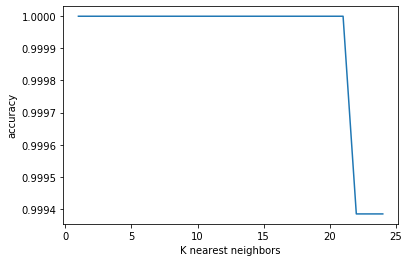

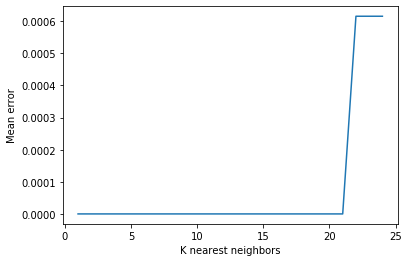

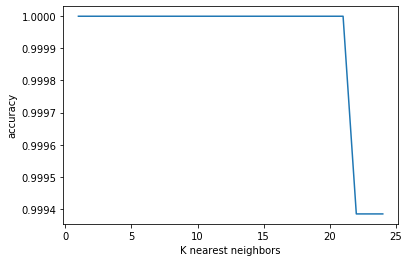

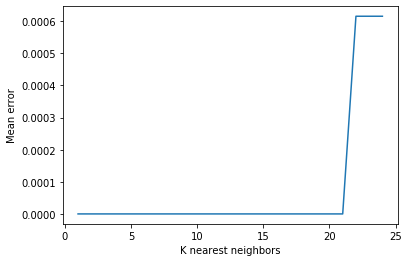

In [17]:
scores_listm,error_listm=neighb(k_list,X_trainm,y_trainm,X_testm,y_testm,1)
plt.plot(k_list,scores_listm)
plt.xlabel("K nearest neighbors")
plt.ylabel("accuracy")
plt.show()
plt.plot(k_list,error_listm)
plt.xlabel("K nearest neighbors")
plt.ylabel("Mean error")
plt.show()

scores_listm,error_listm=neighb(k_list,X_trainm,y_trainm,X_testm,y_testm,2)
plt.plot(k_list,scores_listm)
plt.xlabel("K nearest neighbors")
plt.ylabel("accuracy")
plt.show()
plt.plot(k_list,error_listm)
plt.xlabel("K nearest neighbors")
plt.ylabel("Mean error")
plt.show()

In [15]:
neighbors=KNeighborsClassifier()
p=[1,2]
param_grid = dict(n_neighbors=k_list,p=p)


grid = GridSearchCV(estimator=neighbors, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(df, y) 

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.437193 using {'n_neighbors': 23, 'p': 2}
0.368482 (0.152520) with: {'n_neighbors': 1, 'p': 1}
0.388650 (0.141888) with: {'n_neighbors': 1, 'p': 2}
0.352622 (0.155638) with: {'n_neighbors': 2, 'p': 1}
0.374360 (0.146072) with: {'n_neighbors': 2, 'p': 2}
0.374158 (0.151972) with: {'n_neighbors': 3, 'p': 1}
0.399341 (0.139357) with: {'n_neighbors': 3, 'p': 2}
0.362807 (0.154011) with: {'n_neighbors': 4, 'p': 1}
0.387738 (0.140523) with: {'n_neighbors': 4, 'p': 2}
0.379579 (0.148141) with: {'n_neighbors': 5, 'p': 1}
0.410236 (0.134119) with: {'n_neighbors': 5, 'p': 2}
0.371371 (0.149868) with: {'n_neighbors': 6, 'p': 1}
0.400253 (0.138000) with: {'n_neighbors': 6, 'p': 2}
0.382620 (0.145384) with: {'n_neighbors': 7, 'p': 1}
0.416266 (0.131477) with: {'n_neighbors': 7, 'p': 2}
0.375070 (0.149112) with: {'n_neighbors': 8, 'p': 1}
0.407195 (0.134800) with: {'n_neighbors': 8, 'p': 2}
0.383886 (0.145723) with: {'n_neighbors': 9, 'p': 1}
0.420471 (0.130749) with: {'n_neighbors': 9, 'p': 

In [16]:
neighbors=KNeighborsClassifier()
p=[1,2]
param_grid = dict(n_neighbors=k_list,p=p)


grid = GridSearchCV(estimator=neighbors, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(df_mushroom, y_mushroom) 

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.930576 using {'n_neighbors': 2, 'p': 1}
0.928484 (0.089290) with: {'n_neighbors': 1, 'p': 1}
0.928484 (0.089290) with: {'n_neighbors': 1, 'p': 2}
0.930576 (0.083871) with: {'n_neighbors': 2, 'p': 1}
0.930576 (0.083871) with: {'n_neighbors': 2, 'p': 2}
0.897957 (0.138590) with: {'n_neighbors': 3, 'p': 1}
0.897957 (0.138590) with: {'n_neighbors': 3, 'p': 2}
0.898695 (0.135773) with: {'n_neighbors': 4, 'p': 1}
0.898695 (0.135773) with: {'n_neighbors': 4, 'p': 2}
0.897218 (0.139308) with: {'n_neighbors': 5, 'p': 1}
0.897218 (0.139308) with: {'n_neighbors': 5, 'p': 2}
0.898326 (0.135684) with: {'n_neighbors': 6, 'p': 1}
0.898326 (0.135684) with: {'n_neighbors': 6, 'p': 2}
0.897341 (0.138380) with: {'n_neighbors': 7, 'p': 1}
0.897341 (0.138380) with: {'n_neighbors': 7, 'p': 2}
0.898080 (0.136262) with: {'n_neighbors': 8, 'p': 1}
0.898080 (0.136262) with: {'n_neighbors': 8, 'p': 2}
0.894756 (0.142930) with: {'n_neighbors': 9, 'p': 1}
0.894756 (0.142930) with: {'n_neighbors': 9, 'p': 2

ROC Curve

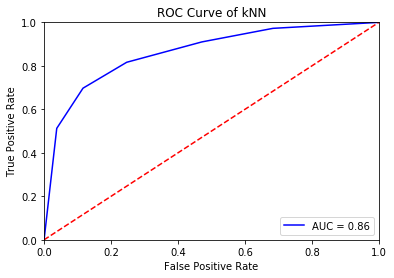

In [18]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
knn = KNeighborsClassifier(n_neighbors = 5,p=2)
knn.fit(X_train,y_train)

y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

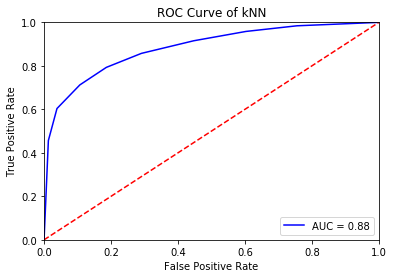

In [27]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
knn = KNeighborsClassifier(n_neighbors = 8,p=1)
knn.fit(X_train,y_train)

y_scores = knn.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

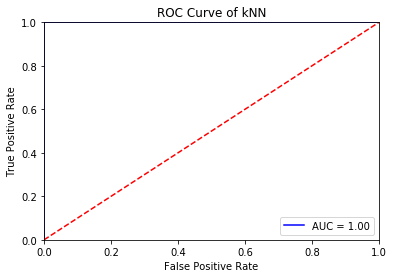

In [8]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
knn = KNeighborsClassifier(n_neighbors = 2,p=1)
knn.fit(X_trainm,y_trainm)

y_scores = knn.predict_proba(X_testm)

fpr, tpr, threshold = roc_curve(y_testm, y_scores[ :, 1],pos_label='p')
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

Confution matrix and Classification Report

In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import time

knn1 = KNeighborsClassifier(n_neighbors = 5,p=2)
t1=time.time()
knn1.fit(X_train,y_train)
train_timet=round(time.time()-t1,3)
print(train_timet)


y_pred = knn1.predict(X_test)
print("Confusion matrix,classification report of energy dataset with p=2 ,k=5")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("_________________________________________________________________________")

knn2 = KNeighborsClassifier(n_neighbors = 8,p=1)
knn2.fit(X_train,y_train)

y_pred = knn2.predict(X_test)
print("Confusion matrix,classification report of energy dataset with p=1 ,k=8")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("_________________________________________________________________________")

knn3 = KNeighborsClassifier(n_neighbors = 2,p=1)
knn3.fit(X_trainm,y_trainm)

y_pred = knn3.predict(X_testm)
print("Confusion matrix,classification report of Mushroom dataset with p=1 ,k=2")
print(confusion_matrix(y_testm,y_pred))
print(classification_report(y_testm,y_pred))
print("_________________________________________________________________________")

knn3 = KNeighborsClassifier(n_neighbors = 2,p=2)
knn3.fit(X_trainm,y_trainm)

y_pred = knn3.predict(X_testm)
print("Confusion matrix,classification report of Mushroom dataset with p=2 ,k=2")
print(confusion_matrix(y_testm,y_pred))
print(classification_report(y_testm,y_pred))
print("_________________________________________________________________________")

0.143
Confusion matrix,classification report of energy dataset with p=2 ,k=5
[[1102  366]
 [ 452 2027]]
              precision    recall  f1-score   support

         0.0       0.71      0.75      0.73      1468
         1.0       0.85      0.82      0.83      2479

    accuracy                           0.79      3947
   macro avg       0.78      0.78      0.78      3947
weighted avg       0.80      0.79      0.79      3947

_________________________________________________________________________
Confusion matrix,classification report of energy dataset with p=1 ,k=8
[[1221  247]
 [ 492 1987]]
              precision    recall  f1-score   support

         0.0       0.71      0.83      0.77      1468
         1.0       0.89      0.80      0.84      2479

    accuracy                           0.81      3947
   macro avg       0.80      0.82      0.81      3947
weighted avg       0.82      0.81      0.82      3947

______________________________________________________________________